# Phase 1

The first phase of the case study involves four sections – (1) dataset description, (2) data cleaning, (3) Exploratory Data Analysis, and (4) research question.

## Dataset Description

Each group should select one real-world dataset from the list of datasets provided for the project. Each dataset has a description file, which also contains a detailed description of each variable.

In this section of the notebook, you must fulfill the following:

- State a brief description of the dataset.
- Provide a description of the collection process executed to build the dataset.
- Discuss the implications of the data collection method on the generated conclusions and insights.
- Note that you may need to look at relevant sources related to the dataset to acquire necessary information for this part of the project.
- Describe the structure of the dataset file.
  - What does each row and column represent?
  - How many observations are there in the dataset?
  - How many variables are there in the dataset?
  - If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.
- Discuss the variables in each dataset file. What does each variable represent? All variables, even those which are not used for the study, should be described to the reader. The purpose of each variable in the dataset should be clear to the reader of the notebook without having to go through an external link.


In [1]:
#IMPORTS

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


from scipy.stats import zscore
from scipy import stats
from scipy.stats import chi2_contingency


In [2]:
#LOAD SOF PUF 2015 FILE

file_path = 'SOF PUF 2015.csv'
data = pd.read_csv(file_path)


## Data Cleaning

For each used variable, check all the following and, if needed, perform data cleaning:

- There are multiple representations of the same categorical value.
- The datatype of the variable is incorrect.
- Some values are set to default values of the variable.
- There are missing data.
- There are duplicate data.
- The formatting of the values is inconsistent.

**Note**: No need to clean all variables. Clean only the variables utilized in the study.


### Removing Duplicates

In [3]:
# clean duplicates
# `keep = first`, as it's likely that changes (if any) to other values may be an attempt at an update
data.drop_duplicates(["HHNUM", "RQ1_LNO"], keep = "first", inplace = True)

# To verify that these duplicates are in fact gone:
data[data.duplicated(["HHNUM", "RQ1_LNO"], False)]

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND


This code removes and verifies the duplicate records based on two key identifiers: **`HHNUM`** (household number) and **`RQ1_LNO`**  (line number). These two variables uniquely identify a respondent within a household, and duplicates would imply redundant entries.

### Filtering Out Non-Workers

In [4]:
# the dataset also contains people who have been to other countries that are not Overseas Filipino /Workers/ 
# drop all non-working OFW people
data = data[data["RQ14_INDWORK"] == True]
data = data.loc[data['RQ10_REASON'] <= 2]

This line filters the dataset to retain only individuals who have a job or business abroad, as indicated by the variable **`RQ14_INDWORK`** (whether the respondent worked abroad) and filters the dataset to include only respondents whose reason for leaving the country is work-related by variable **`RQ10_REASON`**.

### Mapping data
To enhance readability and comprehension, we converted the encoded integers in this dataset into strings or equivalent type, so users can interpret the data without needing to reference value mappings.

In [5]:
data["RREG"] = data['RREG'].astype("category").cat.rename_categories({
    1: "Ilocos",
    2: "Cagayan Valley",
    3: "Central Luzon",
    41: "CALABARZON",
    42: "MIMAROPA",
    5: "Bicol",
    6: "Western Visayas",
    7: "Central Visayas",
    8: "Eastern Visayas",
    9: "Zamboanga",
    10: "Northern Mindanao",
    11: "Davao",
    12: "SOCCKSARGEN",
    13: "National Capital Region",
    14: "Cordilleras",
    15: "Bangsamoro", # ARMM in 2015
    16: "CARAGA",
    # Negros Island Region didn't exist yet
})

In [6]:
data["RQ3_SEX"] = data['RQ3_SEX'].astype("category").cat.rename_categories({
    1: "Male",
    2: "Female",
})

In [7]:
data["RQ8_HGRADE"] = data['RQ8_HGRADE'].astype("string").map({
    "1": "Elementary undergraduate",
    "2": "Elementary graduate",
    "3": "High school undergraduate",
    "4": "High school graduate",
    "5": "Technical-vocational undergraduate",
    "6": "College undergraduate",

    # these values represent distinct graduate degrees, probably defined by PSOC 1992
    # merging them
    "50": "Technical-vocational graduate",
    "51": "Technical-vocational graduate",
    "52": "Technical-vocational graduate",
    "53": "Technical-vocational graduate",
    "54": "Technical-vocational graduate",
    "55": "Technical-vocational graduate",
    "56": "Technical-vocational graduate",
    "57": "Technical-vocational graduate",
    "58": "Technical-vocational graduate",
    "59": "Technical-vocational graduate",
    "60": "College graduate",
    "61": "College graduate",
    "62": "College graduate",
    "63": "College graduate",
    "64": "College graduate",
    "65": "College graduate",
    "66": "College graduate",
    "67": "College graduate",
    "68": "College graduate",
    "69": "College graduate",
}).astype("category")

In [8]:
data["RQ10_REASON"] = data['RQ10_REASON'].astype("category").cat.rename_categories({
    1: "Contract Worker",
    2: "Non-Contract Workers",
    3: "Work with Phil. Embassy/Consulate abroad",
    4: "Tourist",
    5: "Student",
    6: "Immigrant",
    7: "Official Mission",
    8: "Others"
})

In [9]:
data["RQ12_CTRY"] = data['RQ12_CTRY'].astype("category").cat.rename_categories({
    233: "Saudi Arabia",
    234: "United Arab Emirates",
    500: "North and South America",
    400: "Europe",
    211: "Hong Kong",
    222: "Singapore",
    231: "Kuwait",
    232: "Qatar",
    235: "West Asia, other",
    213: "Taiwan",
    212: "Japan",
    221: "Malaysia",
    214: "East Asia, other",
    223: "SE and SC Asia, other",
    300: "Australia",
    100: "Africa",
    600: "Other countries"
})

We remove or replace integer-encoded "N/A" (not applicable) values in the dataset with a proper representation of missing data, **None**.

In [10]:
# remove integer-encoded N/A values
data.loc[data["RQ6M_DTLEFT"] == 99, "RQ6M_DTLEFT"] = None
data.loc[data["RQ6Y_DTLEFT"] == 9999, "RQ6Y_DTLEFT"] = None
data.loc[data["RQ20M_DTEXP"] == 99, "RQ20M_DTEXP"] = None

We convert several columns in the dataset from their current encoded values into boolean (True or False) representations. The goal is to make the data more understandable by transforming it into a binary format, where 1 represents **True** and 0 represents **False**.

In [11]:
# convert values to a bool 
data["RQ14_INDWORK"] = data["RQ14_INDWORK"].map({1: 1, 2: 0}).astype("boolean")
data["RQ17_RET"] = data["RQ17_RET"].map({1: 1, 2: 0, 9: 0}).astype("boolean")
data["RQ25_RET6MOS"] = data["RQ25_RET6MOS"].map({1: 1, 2: 0}).astype("boolean")
data["RP6M_IND"] = data["RP6M_IND"].map({1: 1, 2: 0}).astype("boolean")
data["RQ241C_CONSUM"] = data["RQ241C_CONSUM"].map({None: 0, 1: 1}).astype("boolean")
data["RQ242C_INVEST"] = data["RQ242C_INVEST"].map({None: 0, 2: 1}).astype("boolean")
data["RQ243C_SAVINGS"] = data["RQ243C_SAVINGS"].map({None: 0, 3: 1}).astype("boolean")
data["RQ244C_GIFT"] = data["RQ244C_GIFT"].map({None: 0, 4: 1}).astype("boolean")
data["RQ245C_OTHERS"] = data["RQ245C_OTHERS"].map({None: 0, 5: 1}).astype("boolean")
data["RQ27_INKIND"] = data["RQ27_INKIND"].map({1: 1, 2: 0}).astype("boolean")

This maps detailed occupation codes from the **`RQ15_OCCUP1`** column to broader occupation categories in a new column called **Occupation_Category**. This categorization helps to simplify and clarify the occupation data for analysis.

In [ ]:
# Mapping of RQ15_OCCUP1 codes to broad occupation categories (RQ15_OCCUP1_VS2)
occupation_category_mapping = {
    # Officials, Managers, and Supervisors
    110: "Officials and Managers", 120: "Officials and Managers", 130: "Officials and Managers", 
    141: "Officials and Managers", 144: "Officials and Managers", 210: "Officials and Managers", 
    221: "Officials and Managers", 229: "Officials and Managers", 231: "Officials and Managers", 
    237: "Officials and Managers", 239: "Officials and Managers", 311: "Officials and Managers", 
    319: "Officials and Managers", 411: "Officials and Managers", 412: "Officials and Managers", 
    421: "Officials and Managers", 425: "Officials and Managers", 429: "Officials and Managers", 
    430: "Officials and Managers", 441: "Officials and Managers", 442: "Officials and Managers", 
    449: "Officials and Managers", 490: "Officials and Managers",

    # Professionals
    111: "Professionals", 114: "Professionals", 121: "Professionals", 122: "Professionals", 
    131: "Professionals", 132: "Professionals", 139: "Professionals", 141: "Professionals", 
    142: "Professionals", 151: "Professionals", 159: "Professionals", 211: "Professionals", 
    214: "Professionals", 221: "Professionals", 229: "Professionals", 231: "Professionals", 
    232: "Professionals", 310: "Professionals", 320: "Professionals", 331: "Professionals", 
    333: "Professionals", 341: "Professionals", 342: "Professionals", 351: "Professionals", 
    353: "Professionals", 391: "Professionals", 399: "Professionals", 411: "Professionals", 
    412: "Professionals", 419: "Professionals", 421: "Professionals", 423: "Professionals", 
    430: "Professionals", 441: "Professionals", 446: "Professionals", 449: "Professionals", 
    451: "Professionals", 455: "Professionals", 459: "Professionals", 460: "Professionals",

    # Technicians and Associate Professionals
    119: "Technicians and Associate Professionals", 123: "Technicians and Associate Professionals", 
    133: "Technicians and Associate Professionals", 145: "Technicians and Associate Professionals", 
    152: "Technicians and Associate Professionals", 212: "Technicians and Associate Professionals", 
    219: "Technicians and Associate Professionals", 224: "Technicians and Associate Professionals", 
    242: "Technicians and Associate Professionals", 419: "Technicians and Associate Professionals", 
    431: "Technicians and Associate Professionals", 439: "Technicians and Associate Professionals", 
    444: "Technicians and Associate Professionals", 450: "Technicians and Associate Professionals", 
    471: "Technicians and Associate Professionals", 475: "Technicians and Associate Professionals", 
    480: "Technicians and Associate Professionals",

    # Clerks
    115: "Clerks", 122: "Clerks", 133: "Clerks", 144: "Clerks", 190: "Clerks", 215: "Clerks", 
    223: "Clerks",

    # Service Workers and Shop and Market Sales Workers
    113: "Service Workers and Sales Workers", 123: "Service Workers and Sales Workers", 
    133: "Service Workers and Sales Workers", 139: "Service Workers and Sales Workers", 
    142: "Service Workers and Sales Workers", 153: "Service Workers and Sales Workers", 
    163: "Service Workers and Sales Workers", 230: "Service Workers and Sales Workers", 

    # Farmers, Forestry Workers, and Fishermen
    117: "Farmers, Forestry Workers, and Fishermen", 124: "Farmers, Forestry Workers, and Fishermen", 
    129: "Farmers, Forestry Workers, and Fishermen", 139: "Farmers, Forestry Workers, and Fishermen", 
    212: "Farmers, Forestry Workers, and Fishermen", 222: "Farmers, Forestry Workers, and Fishermen", 
    290: "Farmers, Forestry Workers, and Fishermen", 310: "Farmers, Forestry Workers, and Fishermen", 
    330: "Farmers, Forestry Workers, and Fishermen", 340: "Farmers, Forestry Workers, and Fishermen", 
    490: "Farmers, Forestry Workers, and Fishermen",

    # Trades and Related Workers
    113: "Trades and Related Workers", 123: "Trades and Related Workers", 136: "Trades and Related Workers", 
    142: "Trades and Related Workers", 215: "Trades and Related Workers", 224: "Trades and Related Workers", 
    235: "Trades and Related Workers", 246: "Trades and Related Workers", 333: "Trades and Related Workers", 
    347: "Trades and Related Workers",

    # Plant and Machine Operators and Assemblers
    113: "Plant and Machine Operators", 124: "Plant and Machine Operators", 143: "Plant and Machine Operators", 
    155: "Plant and Machine Operators", 172: "Plant and Machine Operators", 224: "Plant and Machine Operators", 
    240: "Plant and Machine Operators", 259: "Plant and Machine Operators", 269: "Plant and Machine Operators", 
    276: "Plant and Machine Operators", 334: "Plant and Machine Operators",

    # Laborers and Unskilled Workers
    113: "Laborers and Unskilled Workers", 120: "Laborers and Unskilled Workers", 133: "Laborers and Unskilled Workers", 
    162: "Laborers and Unskilled Workers", 214: "Laborers and Unskilled Workers", 313: "Laborers and Unskilled Workers", 
    322: "Laborers and Unskilled Workers",

    # Special Occupations
    113: "Special Occupations", 119: "Special Occupations", 123: "Special Occupations", 910: "Special Occupations", 
    920: "Special Occupations", 930: "Special Occupations", 940: "Special Occupations",
}

# Example usage: Assuming 'data' is your DataFrame
data['Occupation_Category'] = data['RQ15_OCCUP1'].map(occupation_category_mapping)

Converting the data type of the **`RQ13_STAY`** column to a float and replacing specific encoded values that represent infinity with actual infinity values.

In [13]:
# convert to floats for compatibility with inf
data["RQ13_STAY"] = data["RQ13_STAY"].astype("float64")

# replace encoded Infinity values
data.loc[data["RQ13_STAY"] == 88, "RQ13_STAY"] = np.inf

# Exploratory Data Analysis

## Section 1: Understanding The Shape of the Data



This section involves getting a sense of our data's structure, dimensions and the types of variables we will be dealing with.

In [14]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 1 to 5439
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   RREG                 5001 non-null   category
 1   HHNUM                5001 non-null   int64   
 2   RRPL                 5001 non-null   int64   
 3   RSTR                 5001 non-null   int64   
 4   RPSU                 5001 non-null   int64   
 5   RROTATION            5001 non-null   int64   
 6   RQ1_LNO              5001 non-null   int64   
 7   RQ2_REL              5001 non-null   int64   
 8   RQ3_SEX              5001 non-null   category
 9   RQ4_AGE              5001 non-null   int64   
 10  RQ5_TMSLEFT          5001 non-null   int64   
 11  RQ6M_DTLEFT          5001 non-null   float64 
 12  RQ6Y_DTLEFT          5001 non-null   float64 
 13  RQ7_MSTAT            5001 non-null   float64 
 14  RQ8_HGRADE           4988 non-null   category
 15  RQ9_USOCC            5001 

(5001, 49)

In [15]:
data.head()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Occupation_Category
1,Ilocos,2,1,21125,10,26,3,3,Male,29,1,7.0,2012.0,1.0,College graduate,223,Contract Worker,1.0,Taiwan,36.0,True,222.0,36.0,True,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,True,50000.0,True,8000.0,512.6429,True,"Farmers, Forestry Workers, and Fishermen"
2,Ilocos,2,1,21125,10,26,4,3,Female,25,1,4.0,2012.0,2.0,College graduate,223,Contract Worker,1.0,Saudi Arabia,24.0,True,223.0,24.0,True,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,True,60000.0,False,NaN,539.1801,False,Clerks
3,Ilocos,2,1,21125,10,26,10,3,Male,30,4,1.0,2015.0,1.0,College graduate,512,Contract Worker,1.0,United Arab Emirates,12.0,True,512.0,40.0,False,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,True,8000.0,512.6429,True,NaN
4,Ilocos,3,1,21125,10,26,2,3,Male,35,2,2.0,2011.0,2.0,High school graduate,721,Non-Contract Workers,1.0,"East Asia, other",36.0,True,826.0,45.0,True,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,477.4089,False,NaN
5,Ilocos,4,3,21331,20,28,4,5,Male,25,1,1.0,2014.0,2.0,College graduate,921,Contract Worker,1.0,Malaysia,24.0,True,513.0,20.0,False,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,True,50.0,False,NaN,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,513.8142,True,NaN


In [16]:
#Descriptive statistics
description = data.drop("RQ13_STAY", axis=1).describe()
description = data[["RQ4_AGE", "RQ5_TMSLEFT", "RQ22_CASHAMT", "RQ28_KINDAMT", "RQ241P_CONSUM", "RQ242P_INVEST", "RQ243P_SAVINGS", "RQ244P_GIFT", "RQ245P_OTHERS"]].describe()
description["RQ13_STAY"] = data.replace([np.inf, -np.inf], np.nan).dropna(subset=["RQ13_STAY"], how="all")["RQ13_STAY"].describe()
description

,RQ4_AGE,RQ5_TMSLEFT,RQ22_CASHAMT,RQ28_KINDAMT,RQ241P_CONSUM,RQ242P_INVEST,RQ243P_SAVINGS,RQ244P_GIFT,RQ245P_OTHERS,RQ13_STAY
count,5001.000000,5001.000000,3953.000000,783.000000,3882.000000,1069.000000,1555.000000,530.000000,47.000000,4753.000000
mean,36.111378,2.032993,64008.120921,18414.731801,82.016744,30.826941,23.199357,10.992453,37.361702,23.220703
std,9.664709,2.028376,67590.438818,17267.963211,22.243933,22.077048,18.379424,12.158839,26.641277,10.943933
min,17.000000,1.000000,1300.000000,1000.000000,5.000000,1.000000,1.000000,1.000000,10.000000,0.000000
25%,28.000000,1.000000,29000.000000,7000.000000,70.000000,15.000000,10.000000,5.000000,15.000000,13.000000
50%,34.000000,2.000000,47000.000000,12000.000000,90.000000,20.000000,20.000000,10.000000,30.000000,24.000000
75%,42.000000,2.000000,77000.000000,25000.000000,100.000000,45.000000,30.000000,10.000000,50.000000,24.000000
max,78.000000,99.000000,966000.000000,142000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000


## Section 2: Understanding Demographic Identities of the OFWs

In [17]:
age_summary = data['RQ4_AGE'].describe()
age_summary_df = pd.DataFrame(age_summary)

age_summary_df.columns = ['Summary']
age_summary_df.index.name = 'Age'

age_summary_df['Summary'] = age_summary_df['Summary'].apply(lambda x: f"{float(x):.2f}" if '.' in str(x) else x)
print(age_summary_df)

       Summary
Age           
count  5001.00
mean     36.11
std       9.66
min      17.00
25%      28.00
50%      34.00
75%      42.00
max      78.00


#### Q1: What are the demographics (age, region, gender) and the highest educational attainment of OFWs?
This section analyzes the demographics of Overseas Filipino Workers (OFWs). Specifically, their age, region of origin, gender, and highest educational attainment. 

The age distribution suggests that the majority of OFWs fall within the working-age range (roughly 28–43 years old), with the median being 34 years. The minimum age of 3 is an anomaly and could be due to data entry errors.

In [18]:
region_counts = data['RREG'].value_counts()
education_counts = data['RQ8_HGRADE'].value_counts()

print(f"Region Counts:\n{region_counts}\n")
print(f"Education Level Counts:\n{education_counts}\n")


Region Counts:
RREG
CALABARZON                 754
Central Luzon              568
National Capital Region    515
Ilocos                     494
Cagayan Valley             453
Western Visayas            350
Cordilleras                282
Central Visayas            267
SOCCKSARGEN                235
Davao                      167
Eastern Visayas            159
Bicol                      156
Northern Mindanao          150
CARAGA                     137
Bangsamoro                 120
Zamboanga                  116
MIMAROPA                    78
Name: count, dtype: int64

Education Level Counts:
RQ8_HGRADE
College graduate                      1954
High school graduate                  1405
College undergraduate                  705
Technical-vocational graduate          510
High school undergraduate              207
Elementary graduate                    122
Elementary undergraduate                45
Technical-vocational undergraduate      40
Name: count, dtype: int64



In [19]:
gender_distribution = data['RQ3_SEX'].value_counts()
print("Gender distribution (1=Male, 2=Female):")
print(gender_distribution)

Gender distribution (1=Male, 2=Female):
RQ3_SEX
Female    2633
Male      2368
Name: count, dtype: int64


##### Visualizations

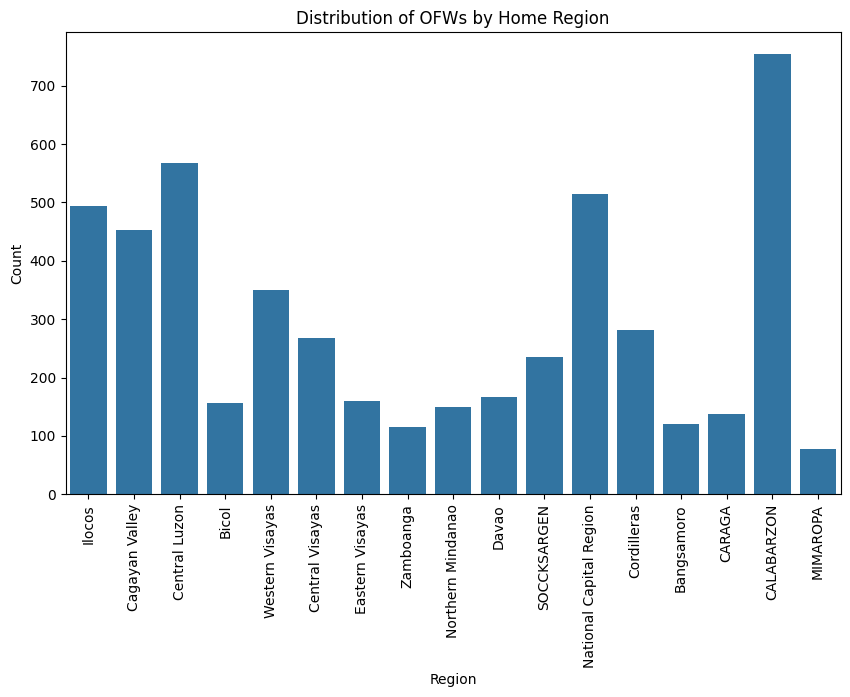

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='RREG')
plt.title('Distribution of OFWs by Home Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


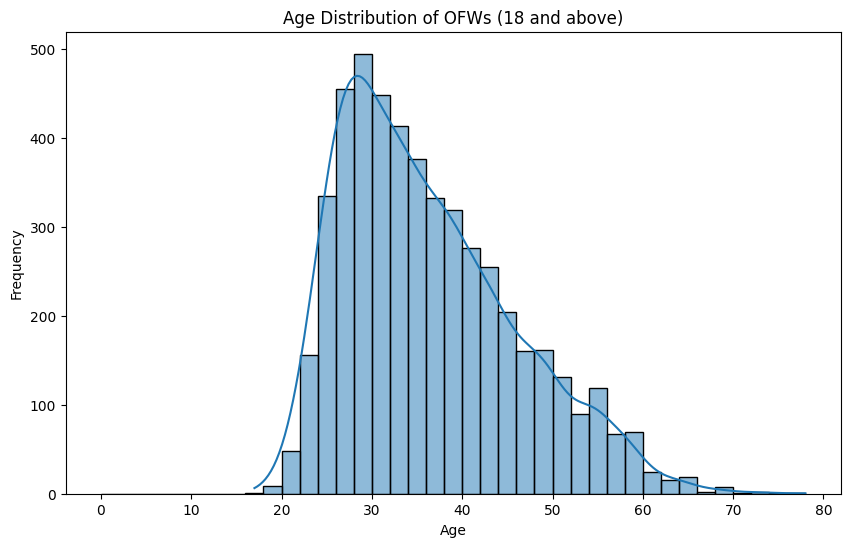

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='RQ4_AGE', kde=True, bins=np.arange(0, 80, 2))
plt.title('Age Distribution of OFWs (18 and above)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

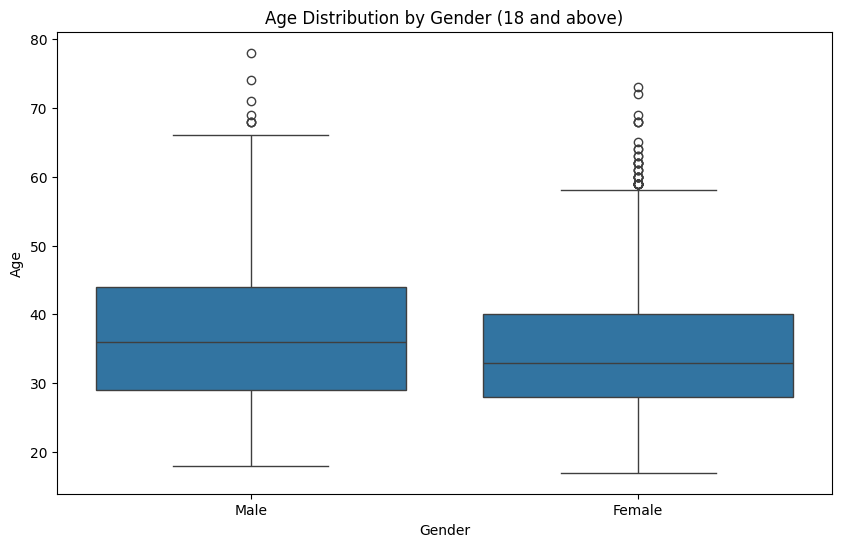

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RQ3_SEX', y='RQ4_AGE', data=data)
plt.title('Age Distribution by Gender (18 and above)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

#### Q2: What are the most common countries OFWs work in and how long do they stay in these countries?

##### Numerical Summaries

In [23]:
unique_rq12_ctry = data['RQ12_CTRY'].unique()
unique_rq12_ctry

['Taiwan', 'Saudi Arabia', 'United Arab Emirates', 'East Asia, other', 'Malaysia', ..., 'Japan', 'Australia', 'SE and SC Asia, other', 'Africa', 'Other countries']
Length: 17
Categories (17, object): ['Africa', 'Hong Kong', 'Japan', 'Taiwan', ..., 'Australia', 'Europe', 'North and South America', 'Other countries']

In [24]:
country_counts = data['RQ12_CTRY'].value_counts()
print(country_counts)

RQ12_CTRY
Saudi Arabia               1217
United Arab Emirates        739
Europe                      356
Hong Kong                   333
North and South America     318
Kuwait                      293
Singapore                   289
Qatar                       269
West Asia, other            243
Taiwan                      212
Malaysia                    177
Japan                       171
East Asia, other            136
SE and SC Asia, other        98
Australia                    80
Africa                       65
Other countries               5
Name: count, dtype: int64


In [25]:
stay_stats = data.groupby('RQ12_CTRY', observed=False)['RQ16_NOMONTH'].describe()
print(stay_stats)

                          count       mean        std  min    25%   50%  \
RQ12_CTRY                                                                 
Africa                     65.0  29.046154  15.207349  0.0  19.00  28.0   
Hong Kong                 333.0  30.102102  17.653332  0.0  15.00  29.0   
Japan                     171.0  27.678363  17.692024  0.0  12.00  28.0   
Taiwan                    212.0  24.127358  15.169744  0.0  12.00  22.0   
East Asia, other          136.0  25.639706  15.749273  0.0  12.00  26.0   
Malaysia                  177.0  24.090395  16.093928  0.0  10.00  24.0   
Singapore                 289.0  29.349481  17.130393  0.0  15.00  30.0   
SE and SC Asia, other      98.0  27.887755  16.944350  0.0  14.00  26.0   
Kuwait                    293.0  25.259386  15.999389  0.0  12.00  24.0   
Qatar                     269.0  25.933086  16.480291  0.0  12.00  25.0   
Saudi Arabia             1217.0  26.676253  16.725297  0.0  12.00  24.0   
United Arab Emirates     

##### Visualization

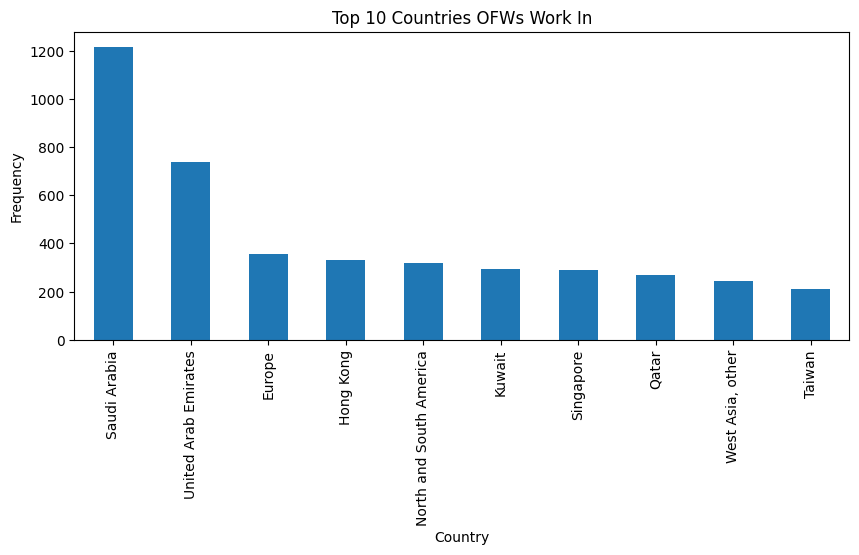

In [26]:
# country_counts.index = country_counts.index.map(mapping)
plt.figure(figsize=(10,4))
country_counts[:10].plot(kind='bar')
plt.title('Top 10 Countries OFWs Work In')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

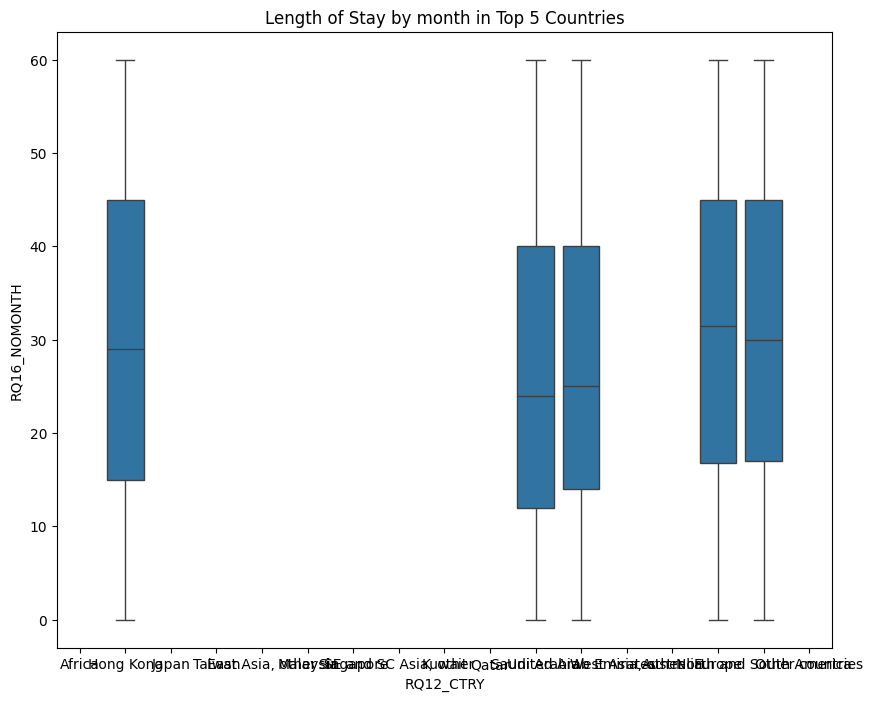

In [27]:
top_countries = data['RQ12_CTRY'].value_counts().index[:5]

plt.figure(figsize=(10,8))
sns.boxplot(data=data[data['RQ12_CTRY'].isin(top_countries)], x='RQ12_CTRY', y='RQ16_NOMONTH')
plt.title('Length of Stay by month in Top 5 Countries')
plt.show()

#### Q3: What are the most common types of jobs that OFWs do abroad

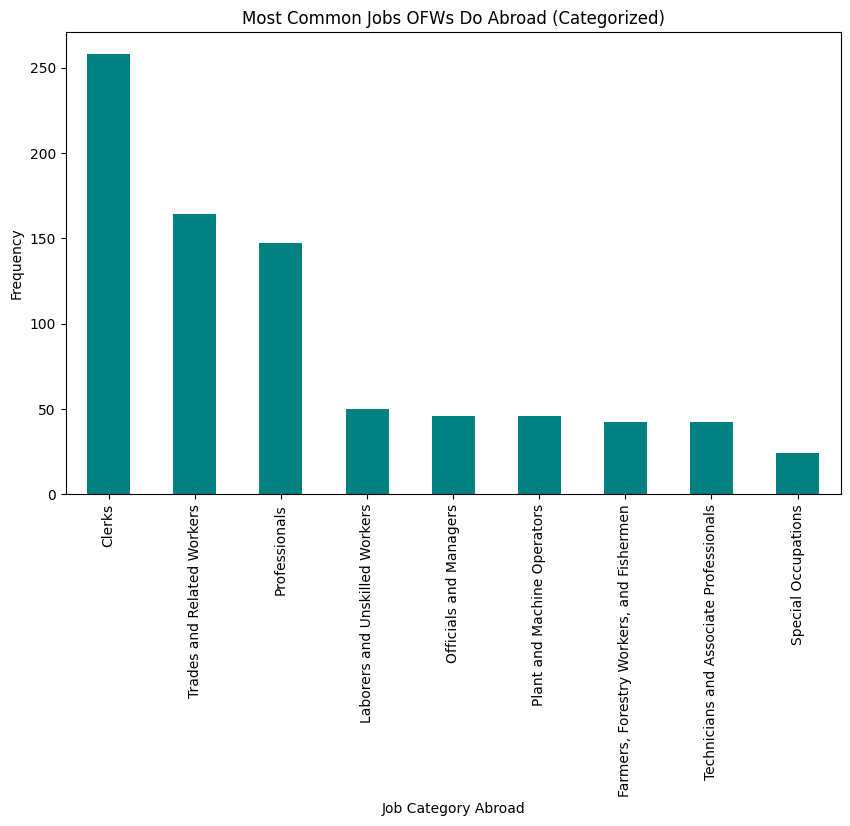

In [28]:
# Apply the occupation mapping to categorize the job codes abroad
data['Occupation_Abroad_Category'] = data['RQ15_OCCUP1'].map(occupation_category_mapping)

# Count the frequency of the categorized occupations abroad
abroad_job_counts = data['Occupation_Abroad_Category'].value_counts()

# Bar chart for jobs abroad (categorized)
plt.figure(figsize=(10, 6))
abroad_job_counts.plot(kind='bar', color='teal')
plt.title('Most Common Jobs OFWs Do Abroad (Categorized)')
plt.xlabel('Job Category Abroad')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


#### Q5: What is the distribution of cash remittances? How much do OFWs typically send home?

In [29]:

cash_remittance_stats = data['RQ22_CASHAMT'].describe()

cash_remittance_skewness = data['RQ22_CASHAMT'].skew()
cash_remittance_mode = data['RQ22_CASHAMT'].mode()[0]

print("Descriptive Statistics:")
print(cash_remittance_stats)
print(f"Skewness: {cash_remittance_skewness}")
print(f"Mode: {cash_remittance_mode}")


Descriptive Statistics:
count      3953.000000
mean      64008.120921
std       67590.438818
min        1300.000000
25%       29000.000000
50%       47000.000000
75%       77000.000000
max      966000.000000
Name: RQ22_CASHAMT, dtype: float64
Skewness: 4.296536063822258
Mode: 60000.0


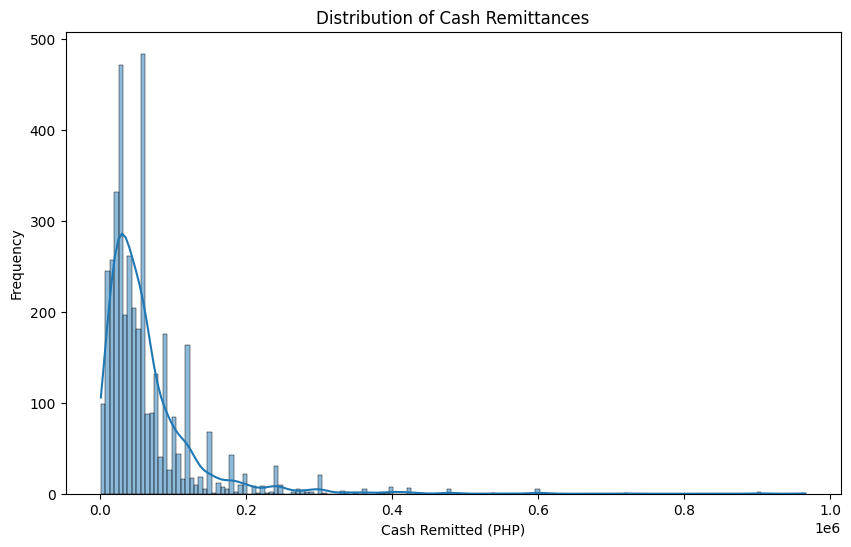

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RQ22_CASHAMT'], kde=True)
plt.title('Distribution of Cash Remittances')
plt.xlabel('Cash Remitted (PHP)')
plt.ylabel('Frequency')
plt.show()


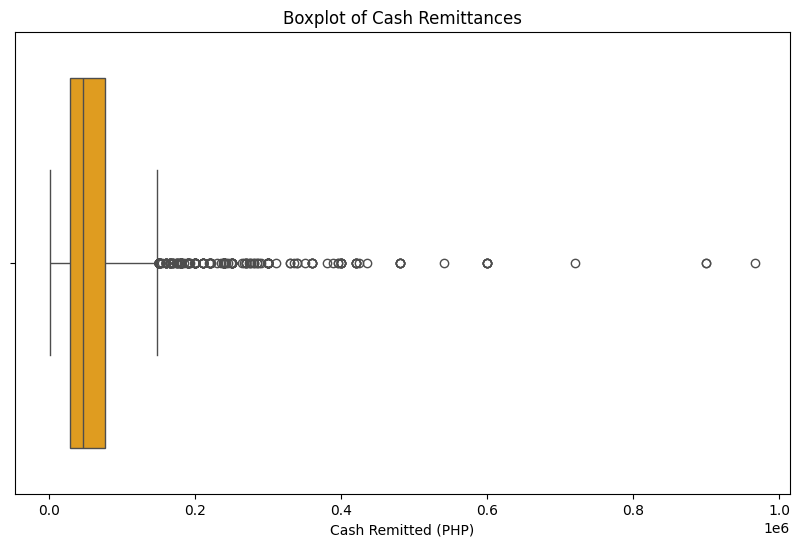

In [31]:
# Boxplot for cash remittances
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['RQ22_CASHAMT'], color='orange')
plt.title('Boxplot of Cash Remittances')
plt.xlabel('Cash Remitted (PHP)')
plt.show()


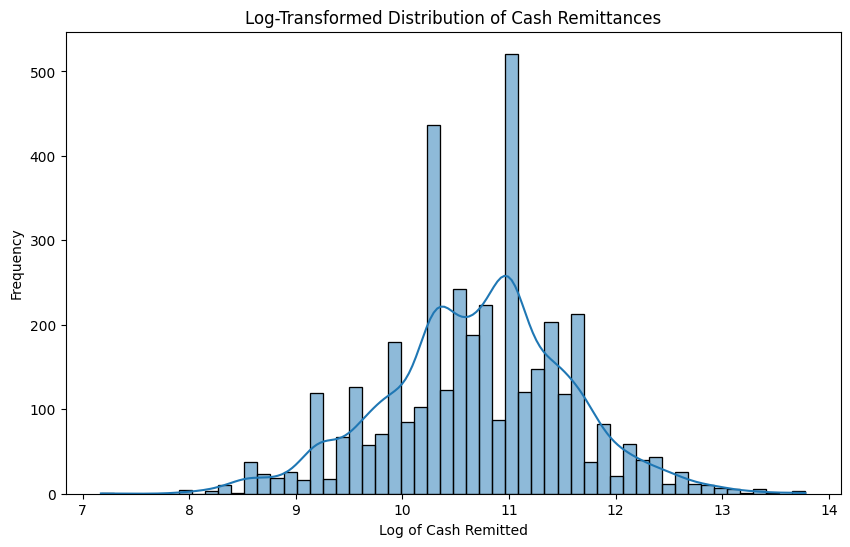

In [32]:
# Apply log transformation to cash remittances
data['Log_CashRemittances'] = np.log1p(data['RQ22_CASHAMT'])  # log1p to handle zero values

# Visualize the transformed distribution with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_CashRemittances'], kde=True)
plt.title('Log-Transformed Distribution of Cash Remittances')
plt.xlabel('Log of Cash Remitted')
plt.ylabel('Frequency')
plt.show()

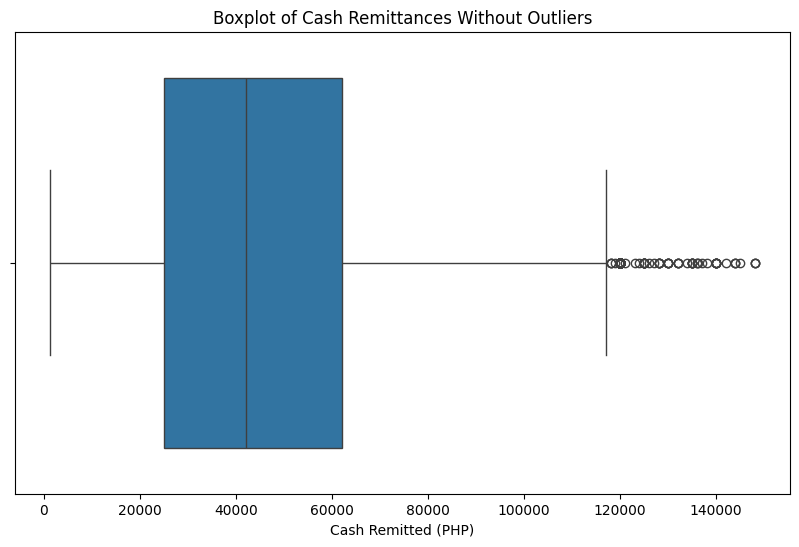

In [33]:
# Calculate IQR
Q1 = data['RQ22_CASHAMT'].quantile(0.25)
Q3 = data['RQ22_CASHAMT'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data[(data['RQ22_CASHAMT'] >= lower_bound) & (data['RQ22_CASHAMT'] <= upper_bound)]

# Boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['RQ22_CASHAMT'])
plt.title('Boxplot of Cash Remittances Without Outliers')
plt.xlabel('Cash Remitted (PHP)')
plt.show()


In [34]:
data['Log_Cash_Remittances'] = np.log1p(data['RQ22_CASHAMT']) 

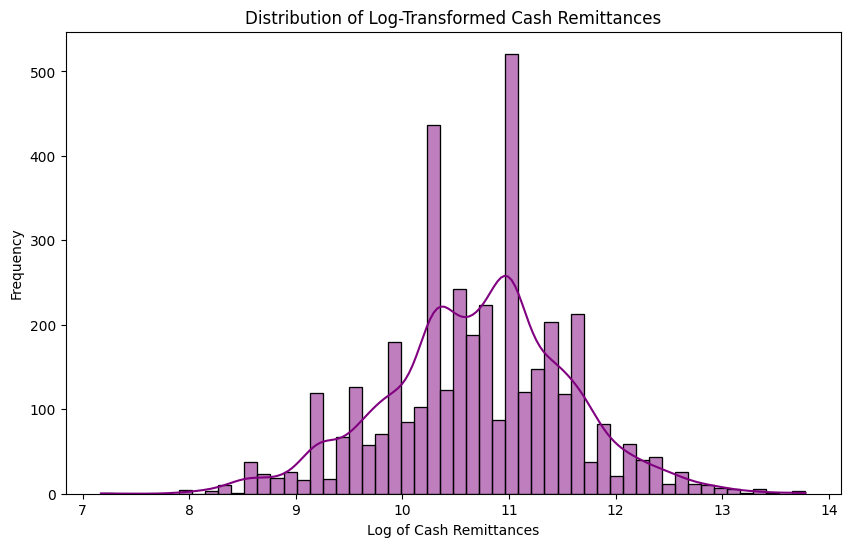

In [35]:
# Plot the histogram for log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Cash_Remittances'], kde=True, color='purple')
plt.title('Distribution of Log-Transformed Cash Remittances')
plt.xlabel('Log of Cash Remittances')
plt.ylabel('Frequency')
plt.show()


####  Q6: OFWs in certain countries remit more money compared to those in other countries.

                         count           mean            std     min      25%  \
RQ12_CTRY                                                                       
Africa                    44.0  101068.181818   86659.826192  6000.0  39500.0   
Hong Kong                285.0   44661.403509   33699.588090  4000.0  24000.0   
Japan                    123.0   88169.235772  113403.219048  8000.0  39850.0   
Taiwan                   164.0   45686.585366   35339.097944  3500.0  20000.0   
East Asia, other         107.0   85523.364486   75003.848429  5000.0  30500.0   
Malaysia                 130.0   36666.538462   32147.237207  4000.0  15000.0   
Singapore                231.0   61038.528139   57903.476921  6000.0  30000.0   
SE and SC Asia, other     73.0   63987.671233   59324.240748  5000.0  30000.0   
Kuwait                   237.0   41573.839662   30273.428930  4000.0  20000.0   
Qatar                    206.0   55880.097087   59349.379284  1300.0  25250.0   
Saudi Arabia             992

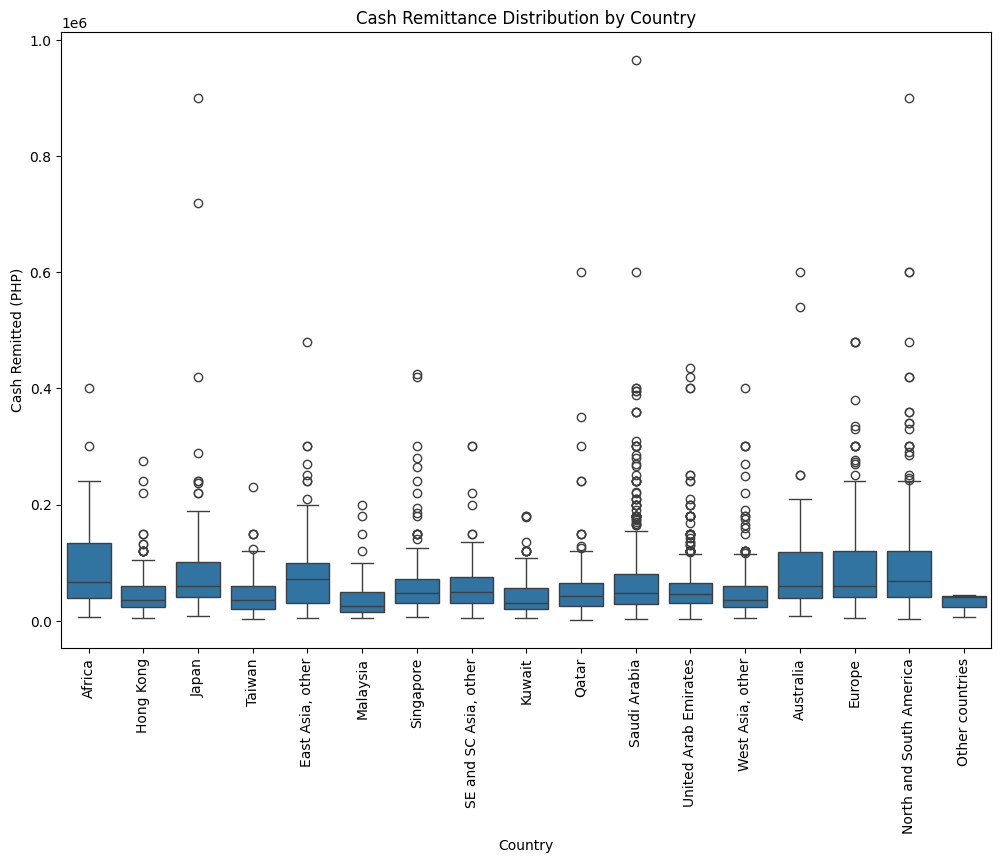

C:\Users\Default.DESKTOP-0VEK9RN\AppData\Local\Temp\ipykernel_16904\1867008185.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_remittance_by_country = data.groupby('RQ12_CTRY')['RQ22_CASHAMT'].mean().sort_values(ascending=False)


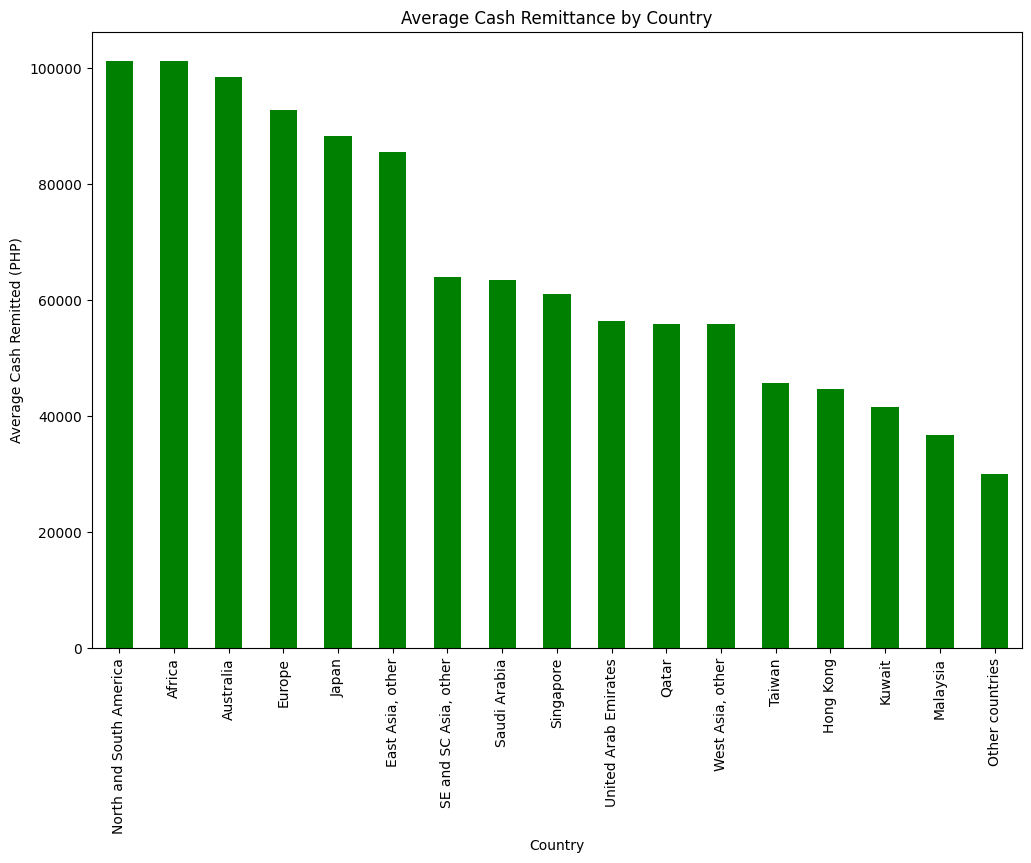

In [36]:
# Group by the new 'Country_Name' column and calculate summary statistics for remittances
remittance_by_country = data.groupby('RQ12_CTRY', observed=False)['RQ22_CASHAMT'].describe()

# Print the summary statistics
print(remittance_by_country)

# Boxplot to compare remittances across different countries
plt.figure(figsize=(12, 8))
sns.boxplot(x='RQ12_CTRY', y='RQ22_CASHAMT', data=data)
plt.title('Cash Remittance Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()

# Bar chart to show average cash remittances by country
avg_remittance_by_country = data.groupby('RQ12_CTRY')['RQ22_CASHAMT'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_remittance_by_country.plot(kind='bar', color='green')
plt.title('Average Cash Remittance by Country')
plt.xlabel('Country')
plt.ylabel('Average Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()


In [37]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) and IQR
Q1 = data['RQ22_CASHAMT'].quantile(0.25)
Q3 = data['RQ22_CASHAMT'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['RQ22_CASHAMT'] < lower_bound) | (data['RQ22_CASHAMT'] > upper_bound)]

# Print the number of outliers detected
print(f"Number of outliers detected: {outliers.shape[0]}")

# Show the outlier rows
outliers.head()


Number of outliers detected: 308


,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Occupation_Category,Occupation_Abroad_Category,Log_CashRemittances,Log_Cash_Remittances
62,Ilocos,57,2,21314,123,26,7,5,Male,44,5,4.0,2015.0,2.0,College graduate,813,Contract Worker,1.0,Malaysia,12.0,True,142.0,50.0,False,NaN,NaN,NaN,4.0,2016.0,1,150000.0,1.0,True,80.0,False,NaN,True,20.0,False,NaN,False,NaN,False,NaN,False,NaN,478.4997,True,Trades and Related Workers,Trades and Related Workers,11.918397,11.918397
143,Ilocos,125,2,21321,314,26,6,2,Female,43,4,10.0,2014.0,2.0,High school graduate,21,Contract Worker,1.0,Europe,14.0,True,913.0,55.0,False,NaN,NaN,NaN,12.0,2015.0,1,180000.0,1.0,True,90.0,True,10.0,False,NaN,False,NaN,False,NaN,False,NaN,True,6500.0,478.2327,True,NaN,NaN,12.100718,12.100718
166,Ilocos,143,1,23224,424,26,1,1,Male,38,3,11.0,2014.0,2.0,High school graduate,921,Contract Worker,2.0,Saudi Arabia,12.0,True,713.0,35.0,False,NaN,NaN,NaN,11.0,2015.0,1,174000.0,5.0,True,50.0,False,NaN,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,695.6909,True,NaN,NaN,12.066816,12.066816
194,Ilocos,170,3,22203,444,28,3,3,Male,30,4,9.0,2014.0,2.0,College graduate,921,Contract Worker,2.0,Europe,10.0,True,314.0,40.0,True,8.0,2015.0,2.0,NaN,NaN,1,200000.0,1.0,True,40.0,False,NaN,True,60.0,False,NaN,False,NaN,True,500000.0,False,NaN,512.6429,True,NaN,NaN,12.206078,12.206078
214,Ilocos,187,4,22227,457,28,5,3,Male,31,1,8.0,2014.0,1.0,College graduate,215,Contract Worker,1.0,Saudi Arabia,24.0,True,215.0,13.0,False,NaN,NaN,NaN,8.0,2016.0,1,155000.0,5.0,True,50.0,False,NaN,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,565.2217,True,Trades and Related Workers,Trades and Related Workers,11.951187,11.951187


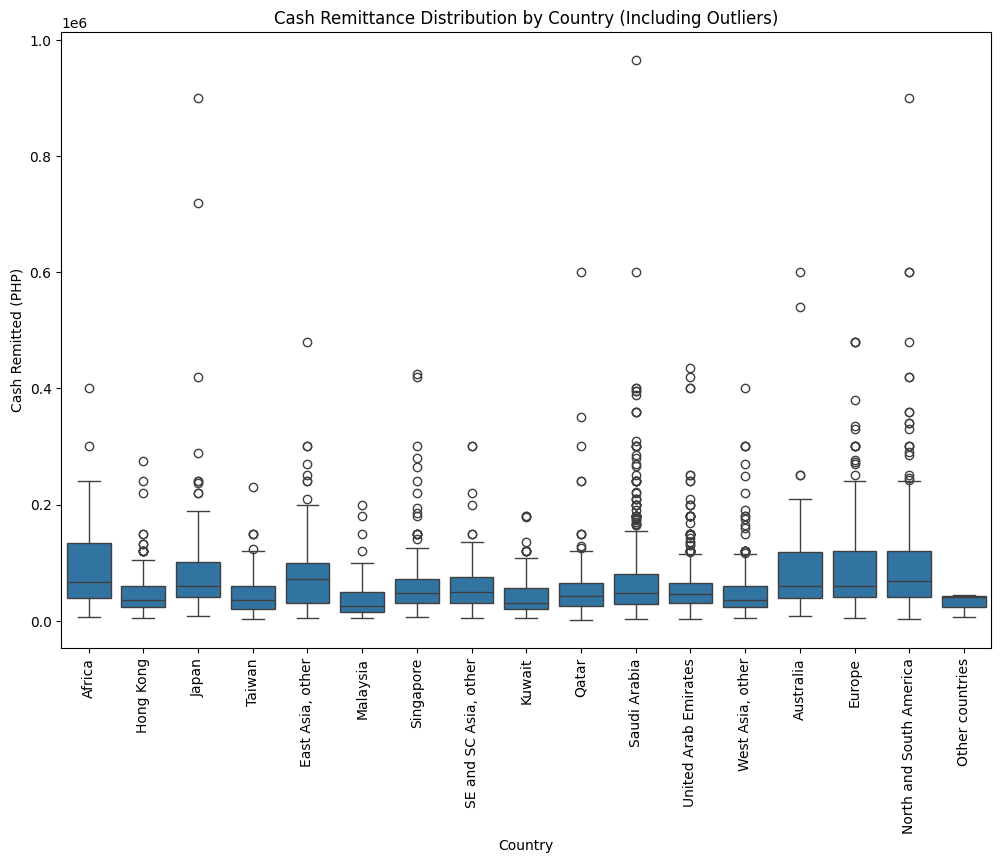

In [38]:
# Boxplot to visualize cash remittances with outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='RQ12_CTRY', y='RQ22_CASHAMT', data=data)
plt.title('Cash Remittance Distribution by Country (Including Outliers)')
plt.xlabel('Country')
plt.ylabel('Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()


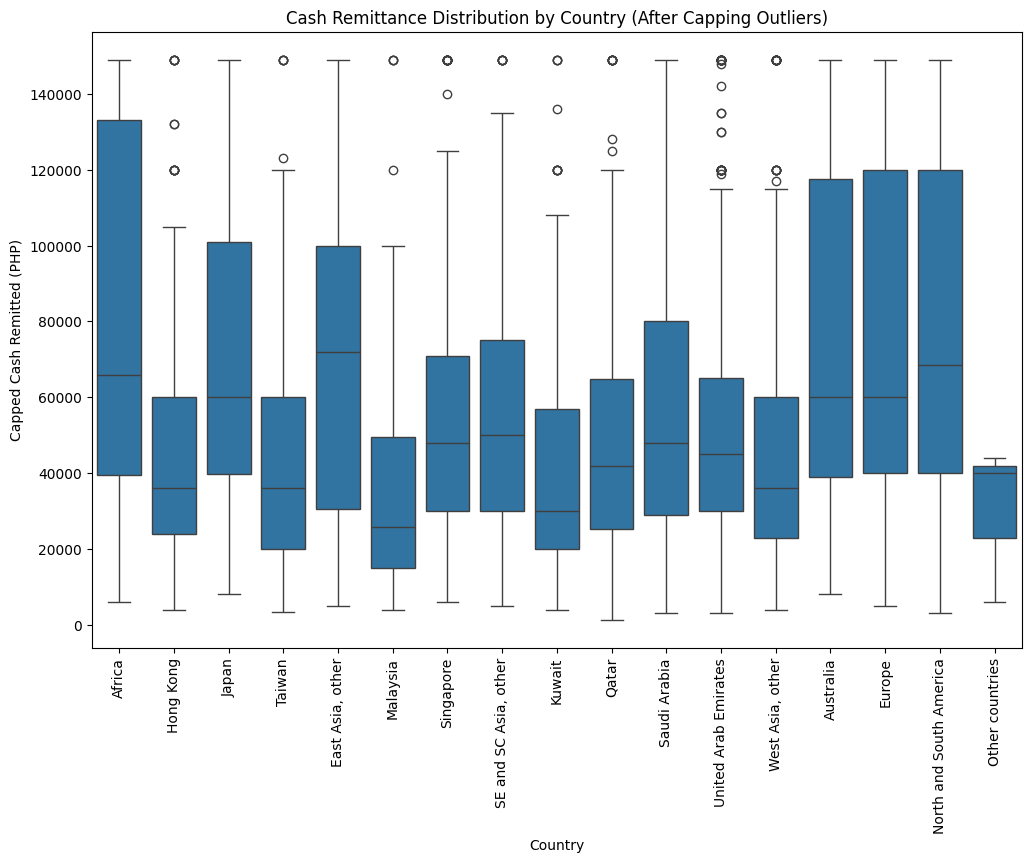

In [39]:
# Cap the values of cash remittances at the upper and lower bounds
data['Capped_CashRemittances'] = data['RQ22_CASHAMT'].clip(lower_bound, upper_bound)

# Boxplot after capping
plt.figure(figsize=(12, 8))
sns.boxplot(x='RQ12_CTRY', y='Capped_CashRemittances', data=data)
plt.title('Cash Remittance Distribution by Country (After Capping Outliers)')
plt.xlabel('Country')
plt.ylabel('Capped Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()


#data.drop(['col name], axis = 1)



In [40]:
data.isna().sum()

RREG                             0
HHNUM                            0
RRPL                             0
RSTR                             0
RPSU                             0
RROTATION                        0
RQ1_LNO                          0
RQ2_REL                          0
RQ3_SEX                          0
RQ4_AGE                          0
RQ5_TMSLEFT                      0
RQ6M_DTLEFT                      0
RQ6Y_DTLEFT                      0
RQ7_MSTAT                        0
RQ8_HGRADE                      13
RQ9_USOCC                        0
RQ10_REASON                      0
RQ11_BASE                        1
RQ12_CTRY                        0
RQ13_STAY                        0
RQ14_INDWORK                     0
RQ15_OCCUP1                      0
RQ16_NOMONTH                     0
RQ17_RET                         0
RQ18M_DTRET                   4015
RQ18Y_DTRET                   4015
RQ19_REASON                   4015
RQ20M_DTEXP                    989
RQ20Y_DTEXP         

#START THE FEATURE UNDERSTANDING

In [41]:
data

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Occupation_Category,Occupation_Abroad_Category,Log_CashRemittances,Log_Cash_Remittances,Capped_CashRemittances
1,Ilocos,2,1,21125,10,26,3,3,Male,29,1,7.0,2012.0,1.0,College graduate,223,Contract Worker,1.0,Taiwan,36.0,True,222.0,36.0,True,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,True,50000.0,True,8000.0,512.6429,True,"Farmers, Forestry Workers, and Fishermen","Farmers, Forestry Workers, and Fishermen",9.615872,9.615872,15000.0
2,Ilocos,2,1,21125,10,26,4,3,Female,25,1,4.0,2012.0,2.0,College graduate,223,Contract Worker,1.0,Saudi Arabia,24.0,True,223.0,24.0,True,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,True,60000.0,False,NaN,539.1801,False,Clerks,Clerks,NaN,NaN,NaN
3,Ilocos,2,1,21125,10,26,10,3,Male,30,4,1.0,2015.0,1.0,College graduate,512,Contract Worker,1.0,United Arab Emirates,12.0,True,512.0,40.0,False,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,True,8000.0,512.6429,True,NaN,NaN,10.778977,10.778977,48000.0
4,Ilocos,3,1,21125,10,26,2,3,Male,35,2,2.0,2011.0,2.0,High school graduate,721,Non-Contract Workers,1.0,"East Asia, other",36.0,True,826.0,45.0,True,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,477.4089,False,NaN,NaN,NaN,NaN,NaN
5,Ilocos,4,3,21331,20,28,4,5,Male,25,1,1.0,2014.0,2.0,College graduate,921,Contract Worker,1.0,Malaysia,24.0,True,513.0,20.0,False,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,True,50.0,False,NaN,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,513.8142,True,NaN,NaN,10.778977,10.778977,48000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,MIMAROPA,4575,1,21204,6194,26,6,3,Male,27,1,2.0,2013.0,1.0,College graduate,23,Contract Worker,1.0,Taiwan,36.0,True,312.0,31.0,False,NaN,NaN,NaN,2.0,2016.0,1,50000.0,1.0,False,NaN,False,NaN,False,NaN,True,5.0,True,95.0,False,NaN,True,15000.0,812.9461,True,NaN,NaN,10.819798,10.819798,50000.0
5436,MIMAROPA,4576,4,21112,6211,28,2,2,Female,26,1,1.0,2012.0,2.0,High school graduate,21,Contract Worker,1.0,United Arab Emirates,36.0,True,421.0,36.0,True,1.0,2015.0,2.0,NaN,NaN,2,NaN,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,744.4370,False,Professionals,Professionals,NaN,NaN,NaN
5437,MIMAROPA,4577,2,21117,6219,26,7,3,Male,34,1,10.0,2013.0,4.0,College undergraduate,723,Contract Worker,1.0,Other countries,36.0,True,921.0,23.0,False,NaN,NaN,NaN,10.0,2016.0,1,44000.0,5.0,True,100.0,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,815.7081,True,NaN,NaN,10.691968,10.691968,44000.0
5438,MIMAROPA,4578,2,21117,6219,26,9,3,Male,30,4,4.0,2015.0,1.0,College graduate,341,Contract Worker,1.0,Saudi Arabia,12.0,True,724.0,48.0,False,NaN,NaN,NaN,4.0,2016.0,1,25000.0,5.0,True,50.0,True,50.0,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,815.7081,True,NaN,NaN,10.126671,10.126671,25000.0


1. What are the demographic characteristics of the overseas Filipino workers?
2. What are the common reasons for leaving the Philippines, and how do they differ based on the type of occupation abroad?

In [42]:
data['RQ4_AGE'].describe()  # For numerical variable age
data['RQ3_SEX'].value_counts()  # For categorical variable gender


RQ3_SEX
Female    2633
Male      2368
Name: count, dtype: int64


## Research Question

Come up with one (1) research question to answer using the dataset. Here are some requirements:

- **Important**: The research question should arise from exploratory data analysis. There should be an explanation regarding the connection of the research question to the answers obtained from performing exploratory data analysis.
- The research question should be within the scope of the dataset.
- The research question should be answerable by performing data mining techniques (i.e., rule mining, clustering, collaborative filtering). Students cannot use other techniques that are not covered in class.
- Make sure to indicate the importance and significance of the research question.
